## 1. Load and preprocess data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten
    
from sklearn.model_selection import train_test_split

In [2]:
import os
if os.path.exists('/content/imageProcessing') == False:
  !git clone https://github.com/amrik220/imageProcessing

Cloning into 'imageProcessing'...
remote: Enumerating objects: 9091, done.
remote: Total 9091 (delta 0), reused 0 (delta 0), pack-reused 9091
Receiving objects: 100% (9091/9091), 65.15 MiB | 31.35 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
# Display output of all code lines in Jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# to reproduce results
seed = 220
rng = np.random.RandomState(seed)

In [5]:
# load data labels from the csv file
# data = pd.read_csv('./emergency_class_labels.csv')
data = pd.read_csv('/content/imageProcessing/classify_as_emergency_vehicle/emergency_class_labels.csv')

data.head()
data.shape

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


(2352, 2)

In [6]:
# check class balance
data.emergency_or_not.value_counts()
data.emergency_or_not.value_counts()[1]/data.emergency_or_not.value_counts()[0]*100

0    1361
1     991
Name: emergency_or_not, dtype: int64

72.81410727406319

In [7]:
# load images and store it in a numpy array
x = []
for img_name in data.image_names:
    # img = plt.imread('./images/' + img_name)
    img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)

    x.append(img)
    
x = np.array(x)

# create target
y = data.emergency_or_not.values

x.ndim, x.shape

(4, (2352, 224, 224, 3))

In [8]:
# preprocessing
x_min = x.min()
x_max = x.max()
x = (x - x_min) / (x_max - x_min)

In [9]:
# Split into Train and Test set
X_train, X_valid, Y_train, Y_valid=train_test_split(x,y,test_size=0.3, random_state=seed)

## 3. Model Building

In [10]:
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten (Flatten)            (None, 2332800)           0         
_________________________________________________________________
dense (Dense)                (None, 100)               233280100 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, epochs=2, validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid,Y_valid))

Epoch 1/2
52/52 [==============================] - 713s 14s/step - loss: 0.6493 - accuracy: 0.6227 - val_loss: 0.5984 - val_accuracy: 0.6870
Epoch 2/2
52/52 [==============================] - 700s 13s/step - loss: 0.5862 - accuracy: 0.6926 - val_loss: 0.5786 - val_accuracy: 0.7068


In [14]:
### MaxPool2D

In [15]:
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 54, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 145800)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               14580100  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 14,613,401
Trainable params: 14,613,401
Non-trainable params: 0
__________________________________________

In [17]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Epoch 1/2
52/52 [==============================] - 596s 11s/step - loss: 0.6852 - accuracy: 0.5529 - val_loss: 0.6833 - val_accuracy: 0.5439
Epoch 2/2
52/52 [==============================] - 610s 12s/step - loss: 0.6502 - accuracy: 0.6337 - val_loss: 0.6161 - val_accuracy: 0.6813


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
There is 62 % chance that it is an emergency vehicle
Whereas actual class is  1


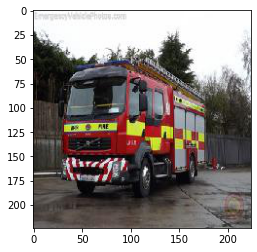

In [18]:
# get predictions
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

# pull out the original images from the data
# which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
# img = plt.imread('./images/' + img_name)
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)


# print probability and actual class
print('There is', prob , '% chance that it is an emergency vehicle')
print('Whereas actual class is ', valid_y[index])

# plot image
plt.imshow(img)

50 % sure that it is emergency
Whereas actual class is  0


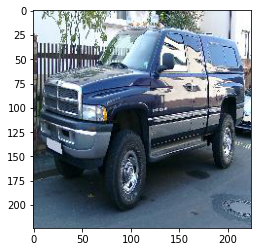

In [19]:
incorrect_indices = np.where(predictions != valid_y)[0]

index = rng.choice(incorrect_indices)
img_name = valid_vehicles[index]


prob = (prediction_probabilities * 100).astype(int)[index]

# img = plt.imread('./images/' + img_name)
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)

print(prob , '% sure that it is emergency')
print('Whereas actual class is ', valid_y[index])

plt.imshow(img)

## 4. Hyperparameter Tuning

In [20]:
# change activation function of hidden layer
# increase hidden neurons
# increase hidden layers
# increase number of epochs
# change optimizer

# increase number of convolutional layers
# increase number of pooling layers
# increase number of convolutional filters
# change size of conv
# change size of pooling
# change padding technique
# change stride

In [21]:
# increase number of convolutional and pooling layers

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(100, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

In [23]:
model.fit(X_train, Y_train, epochs=2 , validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Epoch 1/2
52/52 [==============================] - 673s 13s/step - loss: 0.6940 - accuracy: 0.5656 - val_loss: 0.6674 - val_accuracy: 0.6091
Epoch 2/2
52/52 [==============================] - 664s 13s/step - loss: 0.6807 - accuracy: 0.5656 - val_loss: 0.6671 - val_accuracy: 0.6091


In [24]:
# increase number of convolutional filters

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(200, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Epoch 1/2


In [ ]:
# change filter size for convolutional layer and pooling size for pooling layer

from keras.layers import GlobalMaxPool2D

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(1, 1), padding='valid'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

In [ ]:
# change padding technique

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(1, 1), padding='same'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

In [ ]:
# change stride

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(2, 2), padding='same'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

In [ ]:
# VGG equivalent

model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units = 1024, activation ='sigmoid'))
model.add(Dense(units=1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))